
# <center>Python - Basic Data Wrangling With Pandas <a class="tocSkip"></center>
# <center>QTM 350: Data Science Computing <a class="tocSkip"></center>    
# <center>Davi Moreira <a class="tocSkip"></center>

## Learning Objectives
<hr>

- Inspect a dataframe with `df.head()`, `df.tail()`, `df.info()`, `df.describe()`.
- Obtain dataframe summaries with `df.info()` and `df.describe()`.
- Manipulate how a dataframe displays in Jupyter by modifying Pandas configuration options such as `pd.set_option("display.max_rows", n)`.
- Rename columns of a dataframe using the `df.rename()` function or by accessing the `df.columns` attribute.
- Modify the index name and index values of a dataframe using `.set_index()`, `.reset_index()` , `df.index.name`, `.index`.
- Use `df.melt()` and `df.pivot()` to reshape dataframes, specifically to make tidy dataframes.
- Combine dataframes using `df.merge()` and `pd.concat()` and know when to use these different methods.
- Apply functions to a dataframe `df.apply()` and `df.applymap()`
- Perform grouping and aggregating operations using `df.groupby()` and `df.agg()`.
- Perform aggregating methods on grouped or ungrouped objects such as finding the minimum, maximum and sum of values in a dataframe using `df.agg()`.
- Remove or fill missing values in a dataframe with `df.dropna()` and `df.fillna()`.

## Introduction
<hr>

The material assumes no prior knowledge of Python. Experience with programming concepts or another programming language will help, but is not required to understand the material.

<br>

<center>
<div>
<img src="https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/py4ds.png" width="200"/>
</div>
</center>


This topic material is based on the [Python Programming for Data Science](https://www.tomasbeuzen.com/python-programming-for-data-science/README.html) book and adapted for our purposes in the course.


## DataFrame Characteristics
<hr>

Last lecture topic we looked at how we can create dataframes. Let's now look at some helpful ways we can view our dataframe.

In [4]:
import numpy as np
import pandas as pd

### Head/Tail

The `.head()` and `.tail()` methods allow you to view the top/bottom *n* (default 5) rows of a dataframe. Let's load in the cycling data set and try them out:

In [5]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


The default return value is 5 rows, but we can pass in any number we like. For example, let's take a look at the top 10 rows:

In [6]:
df.head(10)

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires


Or the bottom 5 rows:

In [7]:
df.tail()

,Date,Name,Type,Time,Distance,Comments
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


### DataFrame Summaries

Three very helpful attributes/functions for getting high-level summaries of your dataframe are:
- `.shape`
- `.info()`
- `.describe()`

`.shape` is just like the ndarray attribute we've seen previously. It gives the shape (rows, cols) of your dataframe:

In [8]:
df.shape

(33, 6)

`.info()` prints information about the dataframe itself, such as dtypes, memory usages, non-null values, etc:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      33 non-null     object 
 1   Name      33 non-null     object 
 2   Type      33 non-null     object 
 3   Time      33 non-null     int64  
 4   Distance  31 non-null     float64
 5   Comments  33 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


`.describe()` provides summary statistics of the values within a dataframe:

In [10]:
df.describe()

,Time,Distance
count,33.000000,31.000000
mean,3512.787879,12.667419
std,8003.309233,0.428618
min,1712.000000,11.790000
25%,1863.000000,12.480000
50%,2118.000000,12.620000
75%,2285.000000,12.750000
max,48062.000000,14.570000


By default, `.describe()` only print summaries of numeric features. We can force it to give summaries on all features using the argument `include='all'` (although they may not make sense!):

In [11]:
df.describe(include='all')

,Date,Name,Type,Time,Distance,Comments
count,33,33,33,33.000000,31.000000,33
unique,33,2,1,NaN,NaN,25
top,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,NaN,NaN,Stopped for photo of sunrise
freq,1,17,33,NaN,NaN,3
mean,NaN,NaN,NaN,3512.787879,12.667419,NaN
std,NaN,NaN,NaN,8003.309233,0.428618,NaN
min,NaN,NaN,NaN,1712.000000,11.790000,NaN
25%,NaN,NaN,NaN,1863.000000,12.480000,NaN
50%,NaN,NaN,NaN,2118.000000,12.620000,NaN
75%,NaN,NaN,NaN,2285.000000,12.750000,NaN


### Displaying DataFrames

Displaying your dataframes effectively can be an important part of your workflow. If a dataframe has more than 60 rows, Pandas will only display the first 5 and last 5 rows:

In [12]:
pd.DataFrame(np.random.rand(100))

,0
0,0.965890
1,0.675307
2,0.158509
3,0.894142
4,0.480692
...,...
95,0.597118
96,0.744905
97,0.819575
98,0.520841


For dataframes of less than 60 rows, Pandas will print the whole dataframe:

In [13]:
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires


The 60 row threshold can be a little too much. You can change the setting using `pd.set_option("display.max_rows", 20)` so that anything with more than 20 rows will be summarised by the first and last 5 rows as before:

In [14]:
pd.set_option("display.max_rows", 20)
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


There are also other display options you can change, such as how many columns are shown, how numbers are formatted, etc. See the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#options-and-settings) for more.

One display option to point out is that Pandas allows you to style your tables, for example by highlighting negative values, or adding conditional colour maps to your dataframe. Below we'll style values based on their value ranging from negative (purple) to postive (yellow) but you can see the [styling documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Styling) for more examples.

In [15]:
test = pd.DataFrame(np.random.randn(5, 5),
                    index = [f"row_{_}" for _ in range(5)],
                    columns = [f"feature_{_}" for _ in range(5)])
test.style.background_gradient(cmap='plasma')

,feature_0,feature_1,feature_2,feature_3,feature_4
row_0,-2.006050,-1.309000,0.310897,-0.900410,-0.453907
row_1,0.797546,3.129176,-0.330912,0.737967,1.622200
row_2,0.393544,-0.349411,1.648231,0.246059,-1.093379
row_3,-0.751896,-0.622105,-0.870500,0.887213,0.505246
row_4,-0.366264,1.077208,0.711407,0.367802,-1.135662


### Views vs Copies

In previous lectures we've discussed views ("looking" at a part of an existing object) and copies (making a new copy of the object in memory). These things get a little abstract with Pandas and "...it’s very hard to predict whether it will return a view or a copy" (that's a quote straight [from a dedicated section in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)).

Basically, it depends on the operation you are trying to perform, your dataframe's structure and the memory layout of the underlying array. But don't worry, let me tell you all you need to know. Firstly, the most common warning you'll encounter in Pandas is the `SettingWithCopy`, Pandas raises it as a warning that you might not be doing what you think you're doing. Let's see an example. You may recall there is one outlier `Time` in our dataframe:

In [16]:
df[df['Time'] > 4000]

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good


Imagine we wanted to change this to `2000`. You'd probably do the following:

In [17]:
df[df['Time'] > 4000]['Time'] = 2000

/var/folders/n5/b_zy75fn5vl0dtydj39qwnmwmndbzr/T/ipykernel_65266/808031618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Time'] > 4000]['Time'] = 2000


Ah, there's that warning. Did our dataframe get changed?

In [18]:
df[df['Time'] > 4000]

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good


No it didn't, even though you probably thought it did. What happened above is that `df[df['Time'] > 4000]` was executed first and returned a copy of the dataframe, we can confirm by using `id()`:

In [19]:
print(f"The id of the original dataframe is: {id(df)}")
print(f" The id of the indexed dataframe is: {id(df[df['Time'] > 4000])}")

The id of the original dataframe is: 4802744480
 The id of the indexed dataframe is: 5920366256


We then tried to set a value on this new object by appending `['Time'] = 2000`. Pandas is warning us that we are doing that operation on a copy of the original dataframe, which is probably not what we want. To fix this, you need to index in a single go, using `.loc[]` for example:

In [20]:
df.loc[df['Time'] > 4000, 'Time'] = 2000

No error this time! And let's confirm the change:

In [21]:
df[df['Time'] > 4000]

,Date,Name,Type,Time,Distance,Comments


The second thing you need to know is that if you're ever in doubt about whether something is a view or a copy, you can just use the `.copy()` method to force a copy of a dataframe. Just like this:

In [22]:
df2 = df[df['Time'] > 4000].copy()

That way, your guaranteed a copy that you can modify as you wish.

## Basic DataFrame Manipulations
<hr>

### Renaming Columns

We can rename columns two ways:
1. Using `.rename()` (to selectively change column names)
2. By setting the `.columns` attribute (to change all column names at once)

In [23]:
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Let's give it a go:

In [24]:
df.rename(columns={"Date": "Datetime",
                   "Comments": "Notes"})
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Wait? What happened? Nothing changed? In the code above we did actually rename columns of our dataframe but we didn't modify the dataframe inplace, we made a copy of it. There are generally two options for making permanent dataframe changes:
- 1. Use the argument `inplace=True`, e.g., `df.rename(..., inplace=True)`, available in most functions/methods
- 2. Re-assign, e.g., `df = df.rename(...)`
The Pandas team recommends **Method 2 (re-assign)**, for a [few reasons](https://www.youtube.com/watch?v=hK6o_TDXXN8&t=700) (mostly to do with how memory is allocated under the hood).

In [25]:
df = df.rename(columns={"Date": "Datetime",
                        "Comments": "Notes"})
df

,Datetime,Name,Type,Time,Distance,Notes
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


If you wish to change all of the columns of a dataframe, you can do so by setting the `.columns` attribute:

In [26]:
df.columns = [f"Column {_}" for _ in range(1, 7)]
df

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


### Changing the Index

You can change the index labels of a dataframe in 3 main ways:
1. `.set_index()` to make one of the columns of the dataframe the index
2. Directly modify `df.index.name` to change the index name
3. `.reset_index()` to move the current index as a column and to reset the index with integer labels starting from 0
4. Directly modify the `.index()` attribute

In [27]:
df

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Below I will set the index as `Column 1` and rename the index to "New Index":

In [28]:
df = df.set_index("Column 1")
df.index.name = "New Index"
df

,Column 2,Column 3,Column 4,Column 5,Column 6
New Index,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


I can send the index back to a column and have a default integer index using `.reset_index()`:

In [29]:
df = df.reset_index()
df

,New Index,Column 2,Column 3,Column 4,Column 5,Column 6
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Like with column names, we can also modify the index directly, but I can't remember ever doing this, usually I'll use `.set_index()`:

In [30]:
df.index

RangeIndex(start=0, stop=33, step=1)

In [31]:
df.index = range(100, 133, 1)
df

,New Index,Column 2,Column 3,Column 4,Column 5,Column 6
100,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
101,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
102,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
103,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
104,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
128,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
129,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
130,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
131,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


### Adding/Removing Columns

There are two main ways to add/remove columns of a dataframe:
1. Use `[]` to add columns
2. Use `.drop()` to drop columns

Let's re-read in a fresh copy of the cycling dataset.

In [32]:
df = pd.read_csv('data/cycling_data.csv')
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


We can add a new column to a dataframe by simply using `[]` with a new column name and value(s):

In [33]:
df['Rider'] = 'Tom Beuzen' # The author of the book we are using in our course!
df['Avg Speed'] = df['Distance'] * 1000 / df['Time']  # avg. speed in m/s
df

,Date,Name,Type,Time,Distance,Comments,Rider,Avg Speed
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain,Tom Beuzen,6.055662
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain,Tom Beuzen,5.148163
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather,Tom Beuzen,6.720344
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise,Tom Beuzen,5.857664
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week,Tom Beuzen,6.599683
...,...,...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind",Tom Beuzen,6.754011
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good,Tom Beuzen,5.909725
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!,Tom Beuzen,6.838675
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise,Tom Beuzen,5.192854


In [34]:
df = df.drop(columns=['Rider', 'Avg Speed'])
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


### Adding/Removing Rows

You won't often be adding rows to a dataframe manually (you'll usually add rows through concatenating/joining - that's coming up next). You can add/remove rows of a dataframe in two ways:
1. Use `.concat()` to add rows
2. Use `.drop()` to drop rows

In [35]:
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Let's add a new row to the bottom of this dataframe:

In [36]:
another_row = pd.DataFrame([["12 Oct 2019, 00:10:57", "Morning Ride", "Ride",
                             2331, 12.67, "Washed and oiled bike last night"]],
                           columns=df.columns,
                           index=[33])

df = pd.concat([df, another_row], ignore_index = False)
df
# If you want the indices to be ignored and a new continuous index to be created, you can use ignore_index=True
# df = pd.concat([df, another_row], ignore_index = True)

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


We can drop all rows above index 30 using `.drop()`:

In [37]:
df.drop(index=range(30, 34))

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
25,"2 Oct 2019, 13:46:06",Morning Ride,Ride,2134,13.06,Bit tired today but good weather
26,"3 Oct 2019, 00:45:22",Afternoon Ride,Ride,1724,12.52,Feeling good
27,"3 Oct 2019, 13:47:36",Morning Ride,Ride,2182,12.68,Wet road
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"


## DataFrame Reshaping
<hr>

[Tidy data](https://vita.had.co.nz/papers/tidy-data.pdf) is about "linking the structure of a dataset with its semantics (its meaning)". It is defined by:
1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

Often you'll need to reshape a dataframe to make it tidy (or for some other purpose).
    
![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/tidy.png)

Source: [r4ds](https://r4ds.had.co.nz/tidy-data.html#fig:tidy-structure)

### Melt and Pivot

Pandas `.melt()`, `.pivot()` and `.pivot_table()` can help reshape dataframes
- `.melt()`: make wide data long.
- `.pivot()`: make long data wide.
- `.pivot_table()`: same as `.pivot()` but can handle multiple indexes.
    
![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/melt_pivot.gif)

Source: [Garrick Aden-Buie's GitHub](https://github.com/gadenbuie/tidyexplain#spread-and-gather)

The below data shows how many courses different instructors taught across different years. If the question you want to answer is something like: "Does the number of courses taught vary depending on year?" then the below would probably not be considered tidy because there are multiple observations of courses taught in a year per row (i.e., there is data for 2018, 2019 and 2020 in a single row):

In [38]:
df = pd.DataFrame({"Name": ["Davi", "Gabriel", "Juliana", "Jin", "Alice"],
                   "2018": [1, 3, 4, 5, 3],
                   "2019": [2, 4, 3, 2, 1],
                   "2020": [5, 2, 4, 4, 3]})
df

,Name,2018,2019,2020
0,Davi,1,2,5
1,Gabriel,3,4,2
2,Juliana,4,3,4
3,Jin,5,2,4
4,Alice,3,1,3


Let's make it tidy with `.melt()`. `.melt()` takes a few arguments, most important is the `id_vars` which indicated which column should be the "identifier".

In [39]:
df_melt = df.melt(id_vars="Name",
                  var_name="Year",
                  value_name="Courses")
df_melt

,Name,Year,Courses
0,Davi,2018,1
1,Gabriel,2018,3
2,Juliana,2018,4
3,Jin,2018,5
4,Alice,2018,3
5,Davi,2019,2
6,Gabriel,2019,4
7,Juliana,2019,3
8,Jin,2019,2
9,Alice,2019,1


The `value_vars` argument allows us to select which specific variables we want to "melt" (if you don't specify `value_vars`, all non-identifier columns will be used). For example, below I'm omitting the `2018` column:

In [40]:
df.melt(id_vars="Name",
        value_vars=["2019", "2020"],
        var_name="Year",
        value_name="Courses")

,Name,Year,Courses
0,Davi,2019,2
1,Gabriel,2019,4
2,Juliana,2019,3
3,Jin,2019,2
4,Alice,2019,1
5,Davi,2020,5
6,Gabriel,2020,2
7,Juliana,2020,4
8,Jin,2020,4
9,Alice,2020,3


Sometimes, you want to make long data wide, which we can do with `.pivot()`. When using `.pivot()` we need to specify the `index` to pivot on, and the `columns` that will be used to make the new columns of the wider dataframe:

In [41]:
df_pivot = df_melt.pivot(index="Name",
                         columns="Year",
                         values="Courses")
df_pivot

Year,2018,2019,2020
Name,,,
Alice,3,1,3
Davi,1,2,5
Gabriel,3,4,2
Jin,5,2,4
Juliana,4,3,4


You'll notice that Pandas set our specified `index` as the index of the new dataframe and preserved the label of the columns. We can easily remove these names and reset the index to make our dataframe look like it originally did:

In [42]:
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None
df_pivot

,Name,2018,2019,2020
0,Alice,3,1,3
1,Davi,1,2,5
2,Gabriel,3,4,2
3,Jin,5,2,4
4,Juliana,4,3,4


`.pivot()` will often get you what you want, but it won't work if you want to:
- Use multiple indexes, or
- Have duplicate index/column labels

In these cases you'll have to use `.pivot_table()`. I won't focus on it too much here because I'd rather you learn about `pivot()` first.

In [43]:
df = pd.DataFrame({"Name": ["Davi", "Davi", "Gabriel", "Gabriel"],
                   "Department": ["CS", "STATS", "CS", "STATS"],
                   "2018": [1, 2, 3, 1],
                   "2019": [2, 3, 4, 2],
                   "2020": [5, 1, 2, 2]}).melt(id_vars=["Name", "Department"], var_name="Year", value_name="Courses")
df

,Name,Department,Year,Courses
0,Davi,CS,2018,1
1,Davi,STATS,2018,2
2,Gabriel,CS,2018,3
3,Gabriel,STATS,2018,1
4,Davi,CS,2019,2
5,Davi,STATS,2019,3
6,Gabriel,CS,2019,4
7,Gabriel,STATS,2019,2
8,Davi,CS,2020,5
9,Davi,STATS,2020,1


In the above case, we have duplicates in `Name`, so `pivot()` won't work. It will throw us a `ValueError: Index contains duplicate entries, cannot reshape`:

In [44]:
df.pivot(index="Name",
         columns="Year",
         values="Courses")

ValueError: Index contains duplicate entries, cannot reshape

In such a case, we'd use `.pivot_table()`. It will apply an aggregation function to our duplicates, in this case, we'll `sum()` them up:

In [45]:
df.pivot_table(index="Name", columns='Year', values='Courses', aggfunc='sum')

Year,2018,2019,2020
Name,,,
Davi,3,5,6
Gabriel,4,6,4


If we wanted to keep the numbers per department, we could specify both `Name` and `Department` as multiple indexes:

In [46]:
df.pivot_table(index=["Name", "Department"], columns='Year', values='Courses')

Year                2018  2019  2020
Name    Department                  
Davi    CS           1.0   2.0   5.0
        STATS        2.0   3.0   1.0
Gabriel CS           3.0   4.0   2.0
        STATS        1.0   2.0   2.0

The result above is a mutlti-index or "hierarchically indexed" dataframe. If you ever have a need to use it, you can read more about `pivot_table()` in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivot-tables).

## Working with Multiple DataFrames
<hr>

Often you'll work with multiple dataframes that you want to stick together or merge. `df.merge()` and `df.concat()` are all you need to know for combining dataframes. The Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) is very helpful for these functions, but they are pretty easy to grasp.


The example joins shown in this section are inspired by [Chapter 15](https://stat545.com/join-cheatsheet.html) of Jenny Bryan's STAT 545 materials.


### Sticking DataFrames Together with `pd.concat()`

You can use `pd.concat()` to stick dataframes together:
- Vertically: if they have the same **columns**, OR
- Horizontally: if they have the same **rows**

In [47]:
df1 = pd.DataFrame({'A': [1, 3, 5],
                    'B': [2, 4, 6]})
df2 = pd.DataFrame({'A': [7, 9, 11],
                    'B': [8, 10, 12]})

In [48]:
df1

,A,B
0,1,2
1,3,4
2,5,6


In [49]:
df2

,A,B
0,7,8
1,9,10
2,11,12


In [50]:
pd.concat((df1, df2), axis=0)  # axis=0 specifies a vertical stick, i.e., on the columns

,A,B
0,1,2
1,3,4
2,5,6
0,7,8
1,9,10
2,11,12


Notice that the indexes were simply joined together? This may or may not be what you want. To reset the index, you can specify the argument `ignore_index=True`:

In [51]:
pd.concat((df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12


Use `axis=1` to stick together horizontally:

In [52]:
pd.concat((df1, df2), axis=1, ignore_index=True)

,0,1,2,3
0,1,2,7,8
1,3,4,9,10
2,5,6,11,12


You are not limited to just two dataframes, you can concatenate as many as you want:

In [53]:
pd.concat((df1, df2, df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,1,2
7,3,4
8,5,6
9,7,8


### Joining DataFrames with `pd.merge()`

`pd.merge()` gives you the ability to "join" dataframes using different rules (just like with SQL if you're familiar with it). You can use `df.merge()` to join dataframes based on shared `key` columns. Methods include:
- "inner join"
- "outer join"
- "left join"
- "right join"

See this great [cheat sheet](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join) and [these great animations](https://github.com/gadenbuie/tidyexplain) for more insights.

In [54]:
df1 = pd.DataFrame({"name": ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                    'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                    'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse Comics']})
df2 = pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                    'year_founded': [1934, 1939, 1992]})


![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/join.png)

An "inner" join will return all rows of `df1` where matching values for "publisher" are found in `df2`:

In [55]:
pd.merge(df1, df2, how="inner", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/inner_join.png)

An "outer" join will return all rows of `df1` and `df2`, placing NaNs where information is unavailable:

In [56]:
pd.merge(df1, df2, how="outer", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Batman,good,male,DC,1934.0
1,Joker,bad,male,DC,1934.0
2,Catwoman,bad,female,DC,1934.0
3,Hellboy,good,male,Dark Horse Comics,NaN
4,NaN,NaN,NaN,Image,1992.0
5,Magneto,bad,male,Marvel,1939.0
6,Storm,good,female,Marvel,1939.0
7,Mystique,bad,female,Marvel,1939.0



![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/outer_join.png)

Return all rows from `df1` and all columns of `df1` and `df2`, populated where matches occur:

In [57]:
pd.merge(df1, df2, how="left", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN



![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/left_join.png)



In [58]:
pd.merge(df1, df2, how="right", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Batman,good,male,DC,1934
1,Joker,bad,male,DC,1934
2,Catwoman,bad,female,DC,1934
3,Magneto,bad,male,Marvel,1939
4,Storm,good,female,Marvel,1939
5,Mystique,bad,female,Marvel,1939
6,NaN,NaN,NaN,Image,1992


There are many ways to specify the `key` to join dataframes on, you can join on index values, different, column names, etc. Another helpful argument is the `indicator` argument which will add a column to the result telling you where matches were found in the dataframes:

In [59]:
pd.merge(df1, df2, how="outer", on="publisher", indicator=True)

,name,alignment,gender,publisher,year_founded,_merge
0,Batman,good,male,DC,1934.0,both
1,Joker,bad,male,DC,1934.0,both
2,Catwoman,bad,female,DC,1934.0,both
3,Hellboy,good,male,Dark Horse Comics,NaN,left_only
4,NaN,NaN,NaN,Image,1992.0,right_only
5,Magneto,bad,male,Marvel,1939.0,both
6,Storm,good,female,Marvel,1939.0,both
7,Mystique,bad,female,Marvel,1939.0,both


By the way, you can use `pd.concat()` to do a simple "inner" or "outer" join on multiple datadrames at once. It's less flexible than merge, but can be useful sometimes.

## More DataFrame Operations
<hr>

### Applying Custom Functions

There will be times when you want to apply a function that is not built-in to Pandas. For this, we also have methods:
- `df.apply()`, applies a function column-wise or row-wise across a dataframe (the function must be able to accept/return an array)
- `df.applymap()`, applies a function element-wise (for functions that accept/return single values at a time)
- `series.apply()`/`series.map()`, same as above but for Pandas series

For example, say you want to use a numpy function on a column in your dataframe:

In [60]:
df = pd.read_csv('data/cycling_data.csv')
df[['Time', 'Distance']].apply(np.sin)

,Time,Distance
0,-0.901866,0.053604
1,-0.901697,0.447197
2,-0.035549,-0.046354
3,-0.739059,0.270228
4,-0.236515,-0.086263
...,...,...
28,-0.683372,0.063586
29,0.150056,0.133232
30,0.026702,0.023627
31,-0.008640,0.221770


Or you may want to apply your own custom function:

In [61]:
def seconds_to_hours(x):
    return x / 3600

df[['Time']].apply(seconds_to_hours)

,Time
0,0.578889
1,0.703056
2,0.517500
3,0.608889
4,0.525278
...,...
28,0.519444
29,0.596944
30,0.511389
31,0.684167


This may have been better as a lambda function...

In [62]:
df[['Time']].apply(lambda x: x / 3600)

,Time
0,0.578889
1,0.703056
2,0.517500
3,0.608889
4,0.525278
...,...
28,0.519444
29,0.596944
30,0.511389
31,0.684167


You can even use functions that require additional arguments. Just specify the arguments in `.apply()`:

In [63]:
def convert_seconds(x, to="hours"):
    if to == "hours":
        return x / 3600
    elif to == "minutes":
        return x / 60

df[['Time']].apply(convert_seconds, to="minutes")

,Time
0,34.733333
1,42.183333
2,31.050000
3,36.533333
4,31.516667
...,...
28,31.166667
29,35.816667
30,30.683333
31,41.050000


Some functions only accept/return a scalar:

In [64]:
int(3.141)

3

In [65]:
float([3.141, 10.345])

TypeError: float() argument must be a string or a real number, not 'list'

For these, we need `.applymap()`:

In [67]:
#df[['Time']].applymap(int)
df[['Time']].map(int)


,Time
0,2084
1,2531
2,1863
3,2192
4,1891
...,...
28,1870
29,2149
30,1841
31,2463


However, there are often "vectorized" versions of common functions like this already available, which are much faster. In the case above, we can use `.astype()` to change the dtype of a whole column quickly:

In [71]:
#time_applymap = %timeit  -q -o -r 3 df[['Time']].applymap(float)
time_map = %timeit  -q -o -r 3 df[['Time']].map(float)
time_builtin = %timeit  -q -o -r 3 df[['Time']].astype(float)
#print(f"'astype' is {time_applymap.average / time_builtin.average:.2f} faster than 'applymap'!")
print(f"'astype' is {time_map.average / time_builtin.average:.2f} faster than 'map'!")

'astype' is 1.50 faster than 'map'!


### Grouping

Often we are interested in examining specific groups in our data. `df.groupby()` allows us to group our data based on a variable(s).

In [72]:
df = pd.read_csv('data/cycling_data.csv')
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Let's group this dataframe on the column `Name`:

In [90]:
dfg = df[['Name', 'Time', 'Distance']].groupby(by='Name')
dfg

What is a `DataFrameGroupBy` object? It contains information about the groups of the dataframe:

![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/groupby_1.png)


The groupby object is really just a dictionary of index-mappings, which we could look at if we wanted to:

In [85]:
dfg.groups

{'Afternoon Ride': [0, 2, 4, 6, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32], 'Morning Ride': [1, 3, 5, 7, 8, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

We can also access a group using the `.get_group()` method:

In [91]:
dfg.get_group('Afternoon Ride')

,Name,Time,Distance
0,Afternoon Ride,2084,12.62
2,Afternoon Ride,1863,12.52
4,Afternoon Ride,1891,12.48
6,Afternoon Ride,1973,12.45
9,Afternoon Ride,2101,12.48
10,Afternoon Ride,48062,12.48
12,Afternoon Ride,2961,12.81
14,Afternoon Ride,2076,12.47
16,Afternoon Ride,1775,12.10
18,Afternoon Ride,1860,12.52


The usual thing to do however, is to apply aggregate functions to the groupby object:

![](https://raw.githubusercontent.com/davi-moreira/2024S_dsc_emory_qtm_350/main/lecture_material/material-topic-03/img/groupby_2.png)

In [92]:
dfg.mean()

,Time,Distance
Name,,
Afternoon Ride,4654.352941,12.462
Morning Ride,2299.875000,12.860


We can apply multiple functions using `.aggregate()`:

In [111]:
dfg.aggregate(['min', 'max', 'mean', 'sum', 'count'])

Time                                  Distance                 \
                 min    max         mean    sum count      min    max    mean   
Name                                                                            
Afternoon Ride  1712  48062  4654.352941  79124    17    11.79  12.81  12.462   
Morning Ride    2090   2903  2299.875000  36798    16    12.45  14.57  12.860   

                              
                   sum count  
Name                          
Afternoon Ride  186.93    15  
Morning Ride    205.76    16

And even apply different functions to different columns:

In [94]:
def num_range(x):
    return x.max() - x.min()

dfg.aggregate({"Time": ['max', 'min', 'mean', num_range], 
               "Distance": ['sum']})

Time                              Distance
                  max   min         mean num_range      sum
Name                                                       
Afternoon Ride  48062  1712  4654.352941     46350   186.93
Morning Ride     2903  2090  2299.875000       813   205.76

By the way, you can use aggregate for non-grouped dataframes too. This is pretty much what `df.describe` does under-the-hood:

In [96]:
df[['Time', 'Distance']].agg(['min', 'count', 'mean', num_range])

,Time,Distance
min,1712.000000,11.790000
count,33.000000,31.000000
mean,3512.787879,12.667419
num_range,46350.000000,2.780000


### Dealing with Missing Values

Missing values are typically denoted with `NaN`. We can use `df.isnull()` to find missing values in a dataframe. It returns a boolean for each element in the dataframe:

In [97]:
df.isnull()

,Date,Name,Type,Time,Distance,Comments
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
28,False,False,False,False,False,False
29,False,False,False,False,False,False
30,False,False,False,False,False,False
31,False,False,False,False,False,False


But it's usually more helpful to get this information by row or by column using the `.any()` or `.info()` method:

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      33 non-null     object 
 1   Name      33 non-null     object 
 2   Type      33 non-null     object 
 3   Time      33 non-null     int64  
 4   Distance  31 non-null     float64
 5   Comments  33 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


In [99]:
df[df.isnull().any(axis=1)]

,Date,Name,Type,Time,Distance,Comments
22,"1 Oct 2019, 00:15:07",Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
24,"2 Oct 2019, 00:13:09",Afternoon Ride,Ride,1756,NaN,A little tired today but good weather


When you have missing values, we usually either drop them or impute them.You can drop missing values with `df.dropna()`:

In [100]:
df.dropna()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...,...
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


Or you can impute ("fill") them using `.fillna()`. This method has various options for filling, you can use a fixed value, the mean of the column, the previous non-nan value, etc:

In [101]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [102]:
df.fillna(0)  # fill with 0

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [103]:
df.fillna(df.mean())  # fill with the mean

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [104]:
df.fillna(method='bfill')  # backward (upwards) fill from non-nan values

/var/folders/n5/b_zy75fn5vl0dtydj39qwnmwmndbzr/T/ipykernel_65266/1424271508.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')  # backward (upwards) fill from non-nan values


,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [105]:
df.fillna(method='ffill')  # forward (downward) fill from non-nan values

/var/folders/n5/b_zy75fn5vl0dtydj39qwnmwmndbzr/T/ipykernel_65266/3551699958.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')  # forward (downward) fill from non-nan values


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


Finally, sometimes it is good to use visualizations to help identify (patterns in) missing values. One possible visualization is to print a heatmap of the dataframe to get a feel for where my missing values are. If you want to run this code, you may need to install `seaborn`:

```sh
conda install seaborn
```

In [107]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7, 7)})

In [108]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


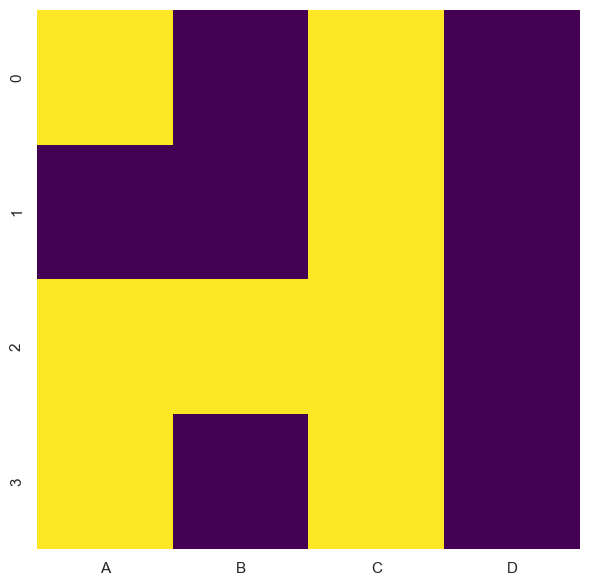

In [109]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False);

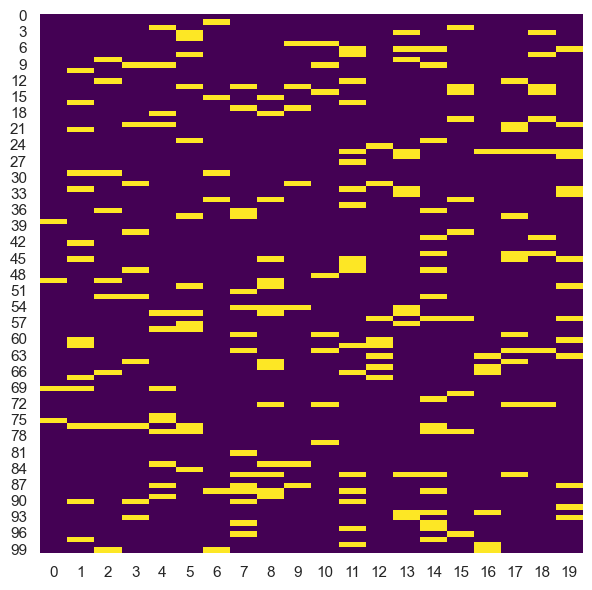

In [110]:
# Generate a larger synthetic dataset for demonstration
np.random.seed(2020)
npx = np.zeros((100,20))
mask = np.random.choice([True, False], npx.shape, p=[.1, .9])
npx[mask] = np.nan
sns.heatmap(pd.DataFrame(npx).isnull(), cmap='viridis', cbar=False);

In [1]:
!jupyter nbconvert _08-py-wrangling-basics.ipynb --to html --template classic --output 08-py-wrangling-basics.html

[NbConvertApp] Converting notebook _08-py-wrangling-basics.ipynb to html
[NbConvertApp] Writing 381943 bytes to 08-py-wrangling-basics.html


# <center>Thank you!<a class="tocSkip"></center>